In [1]:
import multiprocessing
# from manage_experiments import find_finished
from multiprocessing import Pool
import pandas as pd
import json as _json

import glob as _glob

from tqdm import tqdm


def find_finished(folder, select_variables):
        """
                finds all tasks that are finished.
                The tasks are assumed to be created with
                create_tasks and computed with
                ranking_correlations.

                folder has form r'res/'
        """
        finished = []
        for filename in tqdm(_glob.glob(folder+'*.results')):
                with open(filename, 'r') as file:
                        results = _json.load(file)
                        if results['done']:
                                criterion = True
                                for var in select_variables:
                                        if not results[var] == select_variables[var]:
                                                criterion = False
                                if criterion:
                                        finished.append(filename)
        return finished


def pandas_df_from_results(fold):
    json_data = []
    finished = find_finished(fold+r"/", {})
    for f in finished:
        with open(f,"r") as file: 
            data = _json.load(file)
        #     data['losses_0'] = None
        #     data['losses_1'] = None
        #     data['losses_2'] = None
            data['fold_truths_0_train'] = None
            data['fold_truths_0_test'] = None
            data['fold_truths_0_val'] = None
            data['fold_truths_1_train'] = None
            data['fold_truths_1_test'] = None
            data['fold_truths_1_val'] = None
            data['fold_truths_2_train'] = None
            data['fold_truths_2_test'] = None
            data['fold_truths_2_val'] = None
            data['fold_preds_0_train'] = None
            data['fold_preds_0_test'] = None
            data['fold_preds_0_val'] = None
            data['fold_preds_1_train'] = None
            data['fold_preds_1_test'] = None
            data['fold_preds_1_val'] = None
            data['fold_preds_2_train'] = None
            data['fold_preds_2_test'] = None
            data['fold_preds_2_val'] = None
            df_norm = pd.json_normalize(data)
            json_data.append(df_norm)
    return pd.concat(json_data, ignore_index = True)


def f(fold):
    df = pandas_df_from_results(fold)
    df.to_csv(fold+".csv",index=False)

In [2]:
if __name__ == '__main__':
    results_folders = [
        'results_tuning'
        ]
    for fold in results_folders:
        print(fold)
        f(fold)
    # with Pool(1) as p:
        # print(p.map(f,results_folders))

results_tuning


100%|██████████| 18/18 [00:00<00:00, 530.60it/s]


In [3]:
import pandas as pd
df = pd.read_csv('results_tuning.csv')
df.columns
# df1 = pd.read_csv('res_Embeddings_1.csv')
# df2 = pd.read_csv('res_Embeddings_2.csv')

Index(['model_type', 'hidden_dims', 'df_name', 'epochs', 'learning_rate',
       'weight_decay', 'early_stopping', 'n_splits', 'device', 'batch_size',
       ...
       'fold_preds_1_train', 'fold_preds_1_test', 'fold_preds_1_val',
       'fold_preds_2_train', 'fold_preds_2_test', 'fold_preds_2_val',
       'decoder_dim', 'batch_norm', 'dropout', 'irt_output'],
      dtype='object', length=132)

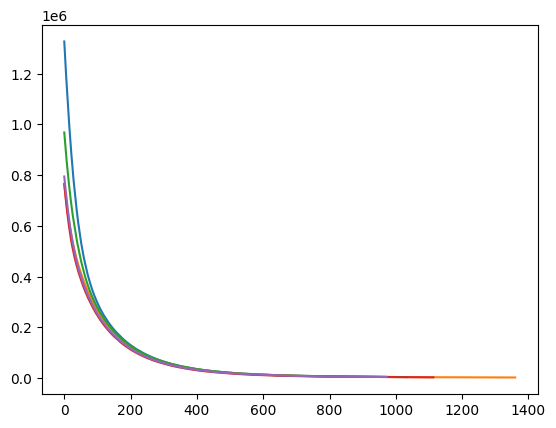

In [4]:
import matplotlib.pyplot as plt
nfolds = 5
for i in range(nfolds):
    plt.plot(eval(df[[f'losses_{i}']].iloc[0,0]))
plt.show()

In [5]:
#df = df.query("df_name == 'mindsteps_set_full'")
#df = df.query("df_name == 'mindsteps_set_matrix'")
df = df.query("df_name == 'mindsteps_set_test_matrix'")
# mindsteps_set_matrix
df['Balanced_Accuracy_test'] = (sum([df[f'Balanced Accuracy_{i}_test'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_val'] = (sum([df[f'Balanced Accuracy_{i}_val'] for i in range(nfolds)]))/nfolds
df['Balanced_Accuracy_train'] = (sum([df[f'Balanced Accuracy_{i}_train'] for i in range(nfolds)]))/nfolds
cols = ['Balanced_Accuracy_test', 'Balanced_Accuracy_val', 'Balanced_Accuracy_train', 'model_type', 
        'hidden_dims', 'decoder_dim', 'batch_norm', 'dropout',  'lambda1', 'lambda2', 'irt_output','weight_decay', 'epochs', 
        'df_name',  'learning_rate', 'early_stopping'] #, 
print(df.shape)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

df[cols].sort_values('Balanced_Accuracy_val', ascending=False)

(18, 135)


,Balanced_Accuracy_test,Balanced_Accuracy_val,Balanced_Accuracy_train,model_type,hidden_dims,decoder_dim,batch_norm,dropout,lambda1,lambda2,irt_output,weight_decay,epochs,df_name,learning_rate,early_stopping
1,0.698276,0.702936,0.741648,IRT,1,NaN,NaN,NaN,0.000000,0.000000,NaN,0,10000,mindsteps_set_test_matrix,0.005,200
8,0.694772,0.698458,0.727812,IRT,5,NaN,NaN,NaN,0.000000,0.000001,NaN,0,10000,mindsteps_set_test_matrix,0.005,200
7,0.688899,0.695535,0.751621,GNN,"[4, 4]",4.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_test_matrix,0.005,200
5,0.691629,0.695013,0.719545,IRT,3,NaN,NaN,NaN,0.000000,0.000001,NaN,0,10000,mindsteps_set_test_matrix,0.005,200
2,0.687495,0.690849,0.756597,GNN,"[4, 4]",8.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_test_matrix,0.005,200
15,0.686797,0.690644,0.756294,GNN,"[8, 4]",4.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_test_matrix,0.005,200
12,0.685788,0.690474,0.758247,GNN,"[8, 4]",8.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_test_matrix,0.005,200
4,0.683308,0.688298,0.769262,IRT,3,NaN,NaN,NaN,0.000000,0.000000,NaN,0,10000,mindsteps_set_test_matrix,0.005,200
3,0.680115,0.686409,0.763143,GNN,"[8, 8]",4.0,False,0.0,NaN,NaN,False,0,10000,mindsteps_set_test_matrix,0.005,200
17,0.682541,0.686386,0.706191,IRT,1,NaN,NaN,NaN,0.000000,0.000001,NaN,0,10000,mindsteps_set_test_matrix,0.005,200


<Axes: xlabel='decoder_dim', ylabel='Balanced_Accuracy_test'>

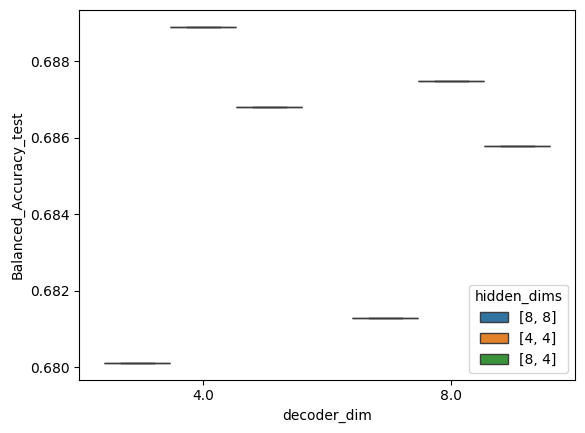

In [6]:
import seaborn as sns
dff = df.query("model_type == 'GNN' & dropout == 0 & batch_norm == False")
sns.boxplot(data=dff, x="decoder_dim", y="Balanced_Accuracy_test", hue="hidden_dims")